# Introduction

Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are added to the data portal when a crash report is finalized or when amendments are made to an existing report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash.
<br><br>Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time, but many of these may disagree with posted information or other assessments on road conditions. If any new or updated information on a crash is received, the reporting officer may amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding police agency, typically crashes on interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset.


# Chicago Car Crashes Project

Build a model to predict the severity of a traffic crashes based on Chicago Police 
Department crash dataset.

## Data 
Using the data from "Chicago Car Crash Dataset" which as more than 569700 records. The dataset as details of date and time of accident occurred, location and cause of accident and soon.<br>

<h3>Dataset: 
<a href="https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if">Dataset Link</a>
</h3>

## Columns of the dataset represents

- **CRASH_RECORD_ID**  : A unique ID can be used to link to the same crash in the Vehicles                                     and people datasets. 
- **RD_NO**:             Chicago Police Department report number. 
- **CRASH_DATE_EST_I** : Crash date estimated by desk officer or reporting party.
- **CRASH_DATE** :       Date and time of crash.
- **POSTED_SPEED_LIMIT**:Posted speed limit.
- **TRAFFIC_CONTROL_DEVICE**:Traffic control device present at crash location.
- **DEVICE_CONDITION**  : Condition of traffic control device.
- **WEATHER_CONDITION** : Weather condition at time of crash.
- **LIGHTING_CONDITION**: Light condition at time of crasH.
- **FIRST_CRASH_TYPE**  : Type of first collision in crash.
- **TRAFFICWAY_TYPE**   : Trafficway type.
- **LANE_CNT**          : Total number of through lanes in either direction, excluding turn lanes.
- **ALIGNMENT**         : Street alignment at crash location.
- **ROADWAY_SURFACE_COND**:Road surface condition.
- **ROAD_DEFECT**       : Road defects.
- **REPORT_TYPE**       : Administrative report type (at scene, at desk, amended).
- **CRASH_TYPE**        : A general severity classification for the crash. Can be either Injury and/or Tow <br>Due to Crash or No Injury / Drive Away.
- **INTERSECTION_RELATED_I**:A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection.
- **NOT_RIGHT_OF_WAY_I**  :Whether the crash begun or first contact was made outside of the public 
right-of-way.
- **HIT_AND_RUN_I**      : Crash did/did not involve a driver who caused the crash and fled the <br> scene without exchanging information and/or rendering aid.
- **DAMAGE**             : A field observation of estimated damage.
- **DATE_POLICE_NOTIFIED**: Calendar date on which police were notified of the crash.
- **PRIM_CONTRIBUTORY_CAUSE**:The factor which was most significant in causing the crash.
- **SEC_CONTRIBUTORY_CAUSE** :The factor which was second most significant in causing the crash.
- **STREET_NO**            :Street address number of crash location.
- **STREET_DIRECTION**     :Street address direction (N,E,S,W) of crash location.
- **STREET_NAME**          :Street address name of crash location.
- **BEAT_OF_OCCURRENCE**   :Chicago Police Department Beat ID.
- **PHOTOS_TAKEN_I**       :Whether the Chicago Police Department took photos at the location of the 
crash.
- **STATEMENTS_TAKEN_I**   :Whether statements were taken from unit(s) involved in crash.
- **DOORING_I**            :Whether crash involved a motor vehicle occupant opening a door into the 
travel path<br> of a bicyclist, causing a crash.
- **WORK_ZONE_I**          :Whether the crash occurred in an active work zone.
- **WORK_ZONE_TYPE**       :The type of work zone.           
- **WORKERS_PRESENT_I**    :Whether construction workers were present in an active work zone at crash                             location
- **NUM_UNITS**            :Number of units involved in the crash. 
- **MOST_SEVERE_INJURY**   :Most severe injury sustained by any person involved in the crash.
- **INJURIES_TOTAL**       :Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries.
- **INJURIES_FATAL**       :Total persons sustaining fatal injuries in the crash.
- **INJURIES_INCAPACITATING**:Total persons sustaining incapacitating/serious injuries in the crash.  - **INJURIES_NON_INCAPACITATING**:Total persons sustaining non-incapacitating injuries in the crash. -**INJURIES_REPORTED_NOT_EVIDENT**:Total persons sustaining possible injuries in the crash.       
- **INJURIES_NO_INDICATION**:Total persons sustaining no injuries in the crash.
- **INJURIES_UNKNOWN**      :Total persons for whom injuries sustained, if any, are unknown.         

- **CRASH_HOUR**            :The hour of the day component of CRASH_DATE. 
- **CRASH_DAY_OF_WEEK**     :The day of the week component of CRASH_DATE. Sunday=1                
- **CRASH_MONTH**           :The month component of CRASH_DATE.                
- **LATITUDE**              :The latitude of the crash location.             
- **LONGITUDE**             :The longitude of the crash location.            
- **LOCATION**              :The crash location.          

## Setting Up Our Data

The modules that are imported to process the data and build the models are
- pandas for data analysis
- numpy for scientific computation
- matplotlib for basic plotting
- seaborn for advanced plotting
- sci-kit learn for modeling & evaluations

## Scrub the Data

In this stage, we'll focus on preprocessing our data. 
- Important steps such as identifying and handling null values in the columns.
- Converted object type feature to int or float type using pandas functions.
- Merged and capped  the values of columns to reduce the outliers.
- Dropped the column which are inconclusive.
- Transformed categorical variables by using one-hot encoding or "dummy variables".

# Importing Libraries/ Dependencies

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Loading Data

In [2]:
data_frame = pd.read_csv('crash_report.csv')
data_frame.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [3]:
data_frame.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [4]:
data_frame.shape

(569700, 49)

# Cleaning Data

### Missing Values

In [5]:
missing_values = data_frame.isna().sum()
print('Column Names                   Missing Values')
missing_values[missing_values>0]

Column Names                   Missing Values


RD_NO                              4002
CRASH_DATE_EST_I                 526621
LANE_CNT                         370725
REPORT_TYPE                       14425
INTERSECTION_RELATED_I           440037
NOT_RIGHT_OF_WAY_I               542866
HIT_AND_RUN_I                    396910
STREET_DIRECTION                      4
STREET_NAME                           1
BEAT_OF_OCCURRENCE                    5
PHOTOS_TAKEN_I                   562677
STATEMENTS_TAKEN_I               558201
DOORING_I                        567872
WORK_ZONE_I                      566152
WORK_ZONE_TYPE                   566891
WORKERS_PRESENT_I                568814
MOST_SEVERE_INJURY                 1175
INJURIES_TOTAL                     1164
INJURIES_FATAL                     1164
INJURIES_INCAPACITATING            1164
INJURIES_NON_INCAPACITATING        1164
INJURIES_REPORTED_NOT_EVIDENT      1164
INJURIES_NO_INDICATION             1164
INJURIES_UNKNOWN                   1164
LATITUDE                           3326


In [6]:
data_frame.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['UNABLE TO DETERMINE', 'FAILING TO YIELD RIGHT-OF-WAY',
       'FOLLOWING TOO CLOSELY', 'NOT APPLICABLE',
       'IMPROPER OVERTAKING/PASSING', 'FAILING TO REDUCE SPEED TO AVOID CRASH',
       'IMPROPER BACKING', 'IMPROPER LANE USAGE', 'IMPROPER TURNING/NO SIGNAL',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'DISREGARDING TRAFFIC SIGNALS',
       'WEATHER',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'DISREGARDING STOP SIGN', 'DISTRACTION - FROM INSIDE VEHICLE',
       'EQUIPMENT - VEHICLE CONDITION', 'PHYSICAL CONDITION OF DRIVER',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DRIVING ON WRONG SIDE/WRONG WAY', 'DISTRACTION - FROM OUTSIDE VEHICLE',
       'EXCEEDING AUTHORIZED SPEED LIMIT',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
       'ROAD CONSTRUCTION/MAINTENANCE'

#### There are some columns which have no significance, so dropping those columns

In [7]:
data_frame.drop(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 
         'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE',
         'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING', 
         'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
         'DATE_POLICE_NOTIFIED','NUM_UNITS','STREET_DIRECTION','STREET_NAME', 'LANE_CNT'], axis=1, inplace=True)

In [8]:
data_frame.fillna('UNKNOWN', inplace=True)

### FIRST_CRASH_TYPE : One Hot Encoding

In [9]:
one_hot = OneHotEncoder(handle_unknown='ignore')

In [10]:
# Making a new data frame for "First Crash Type"
crash = data_frame['FIRST_CRASH_TYPE']
crash_data = pd.DataFrame(crash, columns=['FIRST_CRASH_TYPE'])
crash_data = pd.DataFrame(one_hot.fit_transform(crash_data[['FIRST_CRASH_TYPE']]).toarray())

In [11]:
crash_data.columns = data_frame['FIRST_CRASH_TYPE'].unique()
crash_data.columns

Index(['TURNING', 'REAR END', 'PARKED MOTOR VEHICLE',
       'SIDESWIPE OPPOSITE DIRECTION', 'ANGLE', 'SIDESWIPE SAME DIRECTION',
       'PEDALCYCLIST', 'OTHER OBJECT', 'PEDESTRIAN', 'FIXED OBJECT', 'HEAD ON',
       'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR', 'ANIMAL',
       'OTHER NONCOLLISION', 'OVERTURNED', 'TRAIN'],
      dtype='object')

### FEATURES : Label Encoding

In [12]:
text_column = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 
            'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
            'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','DOORING_I', 'WORK_ZONE_I', 
            'WORK_ZONE_TYPE']
encoding_data = pd.DataFrame()
for column in text_column:
    encoder = LabelEncoder()
    encoding_data[column] = encoder.fit_transform(data_frame[column])
    
encoding_data

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,10,3,0,1,1,1,1,21,36,1,1,2
1,15,1,2,3,8,3,0,1,2,1,1,18,26,1,1,2
2,16,1,2,3,6,3,0,1,1,1,1,18,18,1,1,2
3,4,3,2,0,2,3,0,1,1,1,2,36,36,1,1,2
4,4,3,2,3,4,3,0,1,1,1,1,36,36,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569695,4,3,2,3,12,3,0,1,1,2,1,26,21,1,1,2
569696,16,1,11,5,8,3,5,5,2,1,2,6,26,1,1,2
569697,4,3,2,3,10,3,0,1,2,1,2,36,26,1,1,2
569698,4,3,2,3,8,3,0,1,1,1,2,36,26,1,1,2


In [13]:
no_encoding_data = ['POSTED_SPEED_LIMIT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION']
no_encoding_data = pd.DataFrame(data_frame[no_encoding_data])
no_encoding_data

,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,35,17,4,7,POINT (-87.773287883007 41.919663832993)
1,35,16,6,6,POINT (-87.740953581987 41.741803598989)
2,30,10,6,7,POINT (-87.585022352022 41.773455972008)
3,30,1,7,7,POINT (-87.622114914961 41.802118543011)
4,20,14,4,7,UNKNOWN
...,...,...,...,...,...
569695,10,18,2,7,POINT (-87.721652118145 41.736965321289)
569696,30,21,4,7,POINT (-87.604985730802 41.747538448447)
569697,30,10,2,7,POINT (-87.621572939578 41.752917594949)
569698,15,16,3,7,POINT (-87.668979124866 41.781829602685)


### Merging the 'FIRST_CRASH_TYPE' and 'Label Encoded'

In [14]:
data_frame_2 = pd.merge(crash_data, encoding_data, left_index=True, right_index=True)
data_frame_2

,TURNING,REAR END,PARKED MOTOR VEHICLE,SIDESWIPE OPPOSITE DIRECTION,ANGLE,SIDESWIPE SAME DIRECTION,PEDALCYCLIST,OTHER OBJECT,PEDESTRIAN,FIXED OBJECT,...,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,21,36,1,1,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,1,1,18,26,1,1,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,18,18,1,1,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,1,2,36,36,1,1,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,1,1,36,36,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,2,1,26,21,1,1,2
569696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,2,1,2,6,26,1,1,2
569697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,1,2,36,26,1,1,2
569698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,1,2,36,26,1,1,2


In [15]:
data_frame_2.columns

Index(['TURNING', 'REAR END', 'PARKED MOTOR VEHICLE',
       'SIDESWIPE OPPOSITE DIRECTION', 'ANGLE', 'SIDESWIPE SAME DIRECTION',
       'PEDALCYCLIST', 'OTHER OBJECT', 'PEDESTRIAN', 'FIXED OBJECT', 'HEAD ON',
       'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR', 'ANIMAL',
       'OTHER NONCOLLISION', 'OVERTURNED', 'TRAIN', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'DOORING_I',
       'WORK_ZONE_I', 'WORK_ZONE_TYPE'],
      dtype='object')

# Feature Engineering

### Below shown bar plot of top 10 Primary causes of the crash.
Plots shows that most of accidents caused are unable to determined followed by failing to yield to right of way.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'UNABLE TO DETERMINE'),
  Text(1, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
  Text(2, 0, 'FOLLOWING TOO CLOSELY'),
  Text(3, 0, 'NOT APPLICABLE'),
  Text(4, 0, 'IMPROPER OVERTAKING/PASSING'),
  Text(5, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
  Text(6, 0, 'IMPROPER BACKING'),
  Text(7, 0, 'IMPROPER LANE USAGE'),
  Text(8, 0, 'IMPROPER TURNING/NO SIGNAL'),
  Text(9, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE')])

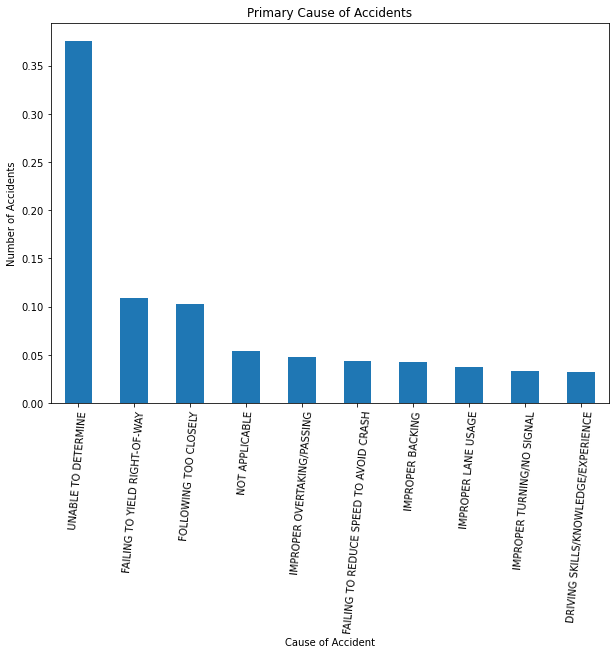

In [16]:
data_frame['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,7))
plt.title('Primary Cause of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=85)

### Counter plot of number of accidents of season

([<matplotlib.axis.XTick at 0x7f5dbee2e550>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

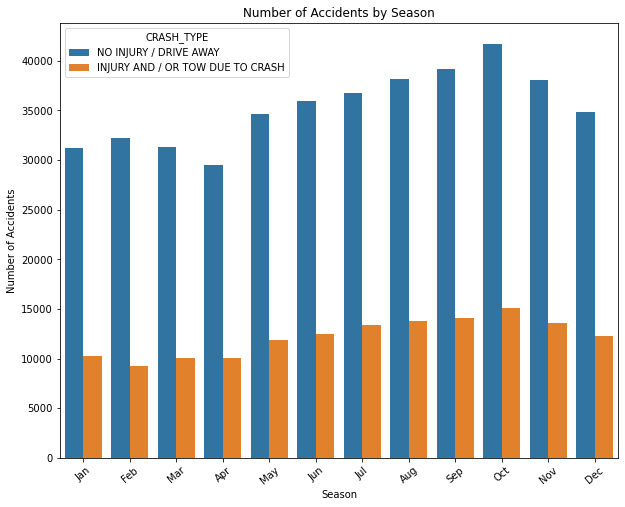

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x="CRASH_MONTH", data=data_frame, hue='CRASH_TYPE')
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(np.arange(12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'),rotation=40)

Noticed increased number of the accidents is in the month of October.

### Histogram of the crash hour
To check the number of accidents in that hour.

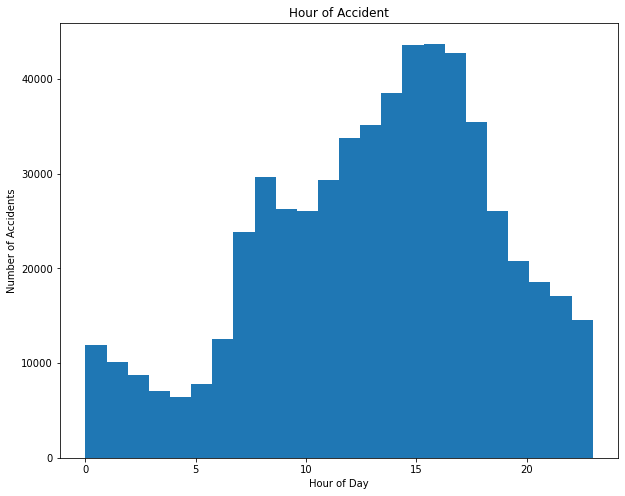

In [18]:
plt.figure(figsize=(10,8))
data_frame['CRASH_HOUR'].plot(kind = 'hist', bins = 24)
plt.title('Hour of Accident')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

Noticed increased number of the accidents in the rush hour.

### Counter plot of effect of weather condition

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'BLOWING SAND, SOIL, DIRT'),
  Text(1, 0, 'BLOWING SNOW'),
  Text(2, 0, 'CLEAR'),
  Text(3, 0, 'CLOUDY/OVERCAST'),
  Text(4, 0, 'FOG/SMOKE/HAZE'),
  Text(5, 0, 'FREEZING RAIN/DRIZZLE'),
  Text(6, 0, 'OTHER'),
  Text(7, 0, 'RAIN'),
  Text(8, 0, 'SEVERE CROSS WIND GATE'),
  Text(9, 0, 'SLEET/HAIL'),
  Text(10, 0, 'SNOW'),
  Text(11, 0, 'UNKNOWN')])

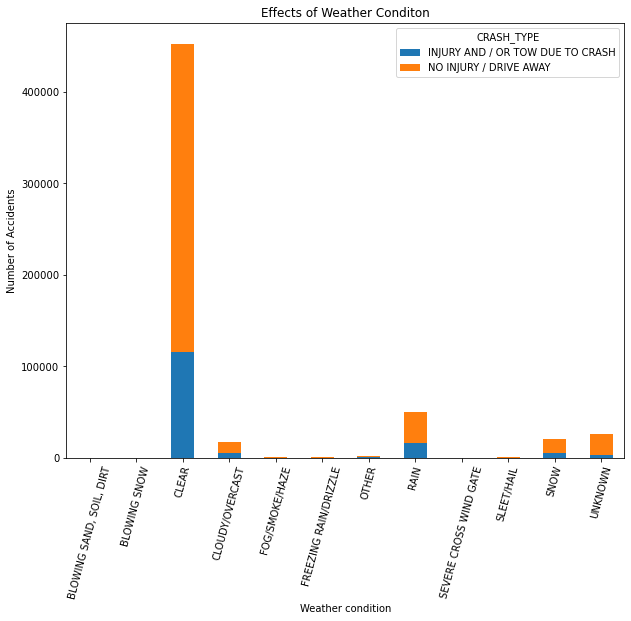

In [19]:
weather = data_frame.groupby(['WEATHER_CONDITION','CRASH_TYPE'])['WEATHER_CONDITION'].count().unstack()
weather.plot( kind='bar', stacked=True, figsize =(10,8))
plt.title('Effects of Weather Conditon')
plt.xlabel('Weather condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

Most accidents occurred in a clear weather condition.

In [20]:
month_bins = [1,4,7,10,13]
label=('Winter','Spring','Summer','Fall')
month_binned = pd.cut(data_frame['CRASH_MONTH'], month_bins, labels= label)
month_binned= month_binned.cat.as_unordered()
data_frame['SEASON']= month_binned
data_frame['SEASON'].value_counts()

Summer    161865
Spring    145106
Winter    122487
Fall       98707
Name: SEASON, dtype: int64

### A counter plot of the number of severe and non severe accidents in different seasons.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Winter'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Fall')])

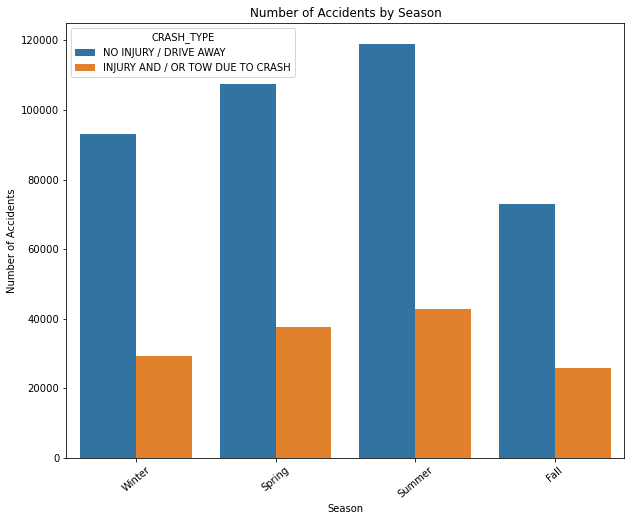

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x="SEASON", data=data_frame, hue='CRASH_TYPE')
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)

Noticed that Summer time is when most of the severe and non severe occurred.

### Counter plot of Road Condition

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'DRY'),
  Text(1, 0, 'UNKNOWN'),
  Text(2, 0, 'WET'),
  Text(3, 0, 'SNOW OR SLUSH'),
  Text(4, 0, 'ICE'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'SAND, MUD, DIRT')])

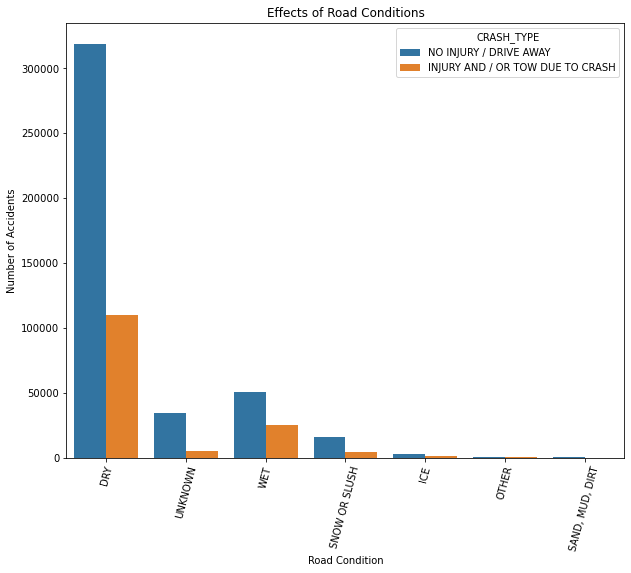

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x="ROADWAY_SURFACE_COND", data=data_frame, hue='CRASH_TYPE')
plt.title('Effects of Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

Noticed most accidents happened in a DRY Road condition.

### Counter plot of Damage cost

(array([0, 1, 2]),
 [Text(0, 0, 'OVER $1,500'),
  Text(1, 0, '$500 OR LESS'),
  Text(2, 0, '$501 - $1,500')])

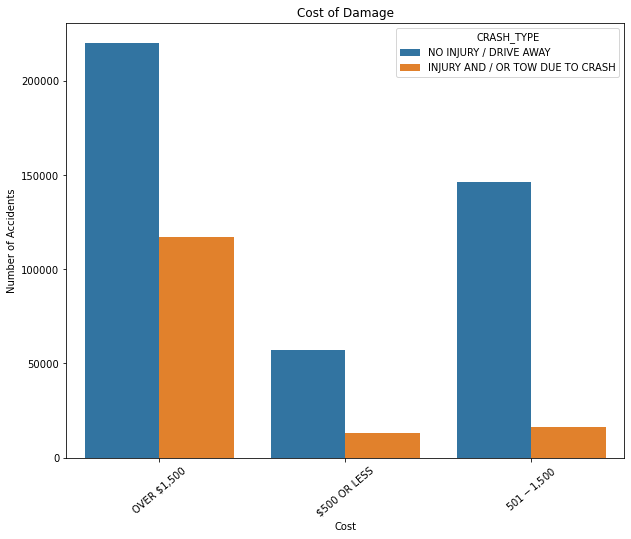

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x="DAMAGE", data=data_frame, hue='CRASH_TYPE')
plt.title('Cost of Damage')
plt.xlabel('Cost')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)

Most severe and non severe accident damage cost is more than $1500.

### TARGET :  'REAR END'

In [24]:
y = data_frame_2['REAR END']
X = data_frame_2.drop(columns=['REAR END','ANGLE', 'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN', 'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST', 'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION', 'FIXED OBJECT', 'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR', 'TRAIN', 'OVERTURNED', 'ANIMAL'], axis=1)

# Modeling

## Logistic Regression (Basic Model)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Pipeline with StandardScaler and Logisitic Regression

In [26]:
data_model = Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(solver='liblinear', fit_intercept=False, random_state=42))])

data_model.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

In [27]:
y_train_pred = data_model.predict(X_train)
y_test_pred = data_model.predict(X_test)

In [28]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.5011080393189398
Accuracy Score Test: 0.4982183605406354
ROC_AUC Test: 0.5678102494291235


In [29]:
print(confusion_matrix(y_test, y_test_pred))

[[56716 57144]
 [   29    51]]


In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66    113860
         1.0       0.00      0.64      0.00        80

    accuracy                           0.50    113940
   macro avg       0.50      0.57      0.33    113940
weighted avg       1.00      0.50      0.66    113940



In [31]:
print(metrics.accuracy_score(y_test, y_test_pred))

0.4982183605406354


## Decision Tree

### Vanilla - Decision Tree Classifier on 'REAR END'

In [32]:
data_model = DecisionTreeClassifier(random_state = 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
data_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [33]:
y_train_pred = data_model.predict(X_train)
y_test_pred = data_model.predict(X_test)

In [34]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.9996379673512374
Accuracy Score Test: 0.9993154291732491
ROC_AUC Test: 0.6686402160548042


In [35]:
print(confusion_matrix(y_test, y_test_pred))

[[113835     25]
 [    53     27]]


In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    113860
         1.0       0.52      0.34      0.41        80

    accuracy                           1.00    113940
   macro avg       0.76      0.67      0.70    113940
weighted avg       1.00      1.00      1.00    113940



### Decision Tree Classifier - Feature Importance

In [37]:
data_model.feature_importances_

array([2.48099950e-02, 1.84848713e-02, 2.40749622e-02, 6.33702569e-02,
       9.62337641e-02, 1.73352929e-02, 4.49038834e-02, 4.49988124e-02,
       9.87841517e-03, 1.53406729e-02, 1.63064725e-02, 4.98106378e-01,
       1.25392550e-01, 5.15468362e-05, 7.10188968e-04, 1.93724499e-06])

Feature ranking:
1. feature 11 (0.498106)
2. feature 12 (0.125393)
3. feature 4 (0.096234)
4. feature 3 (0.063370)
5. feature 7 (0.044999)
6. feature 6 (0.044904)
7. feature 0 (0.024810)
8. feature 2 (0.024075)
9. feature 1 (0.018485)
10. feature 5 (0.017335)
11. feature 10 (0.016306)
12. feature 9 (0.015341)
13. feature 8 (0.009878)
14. feature 14 (0.000710)
15. feature 13 (0.000052)
16. feature 15 (0.000002)


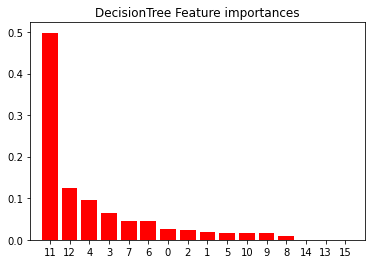

In [38]:
importances = data_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting feature importances of the forest
plt.figure()
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [39]:
def plot_tree(data_tree, used_cols, out_file='mytree.png'):
    export_graphviz(data_tree, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

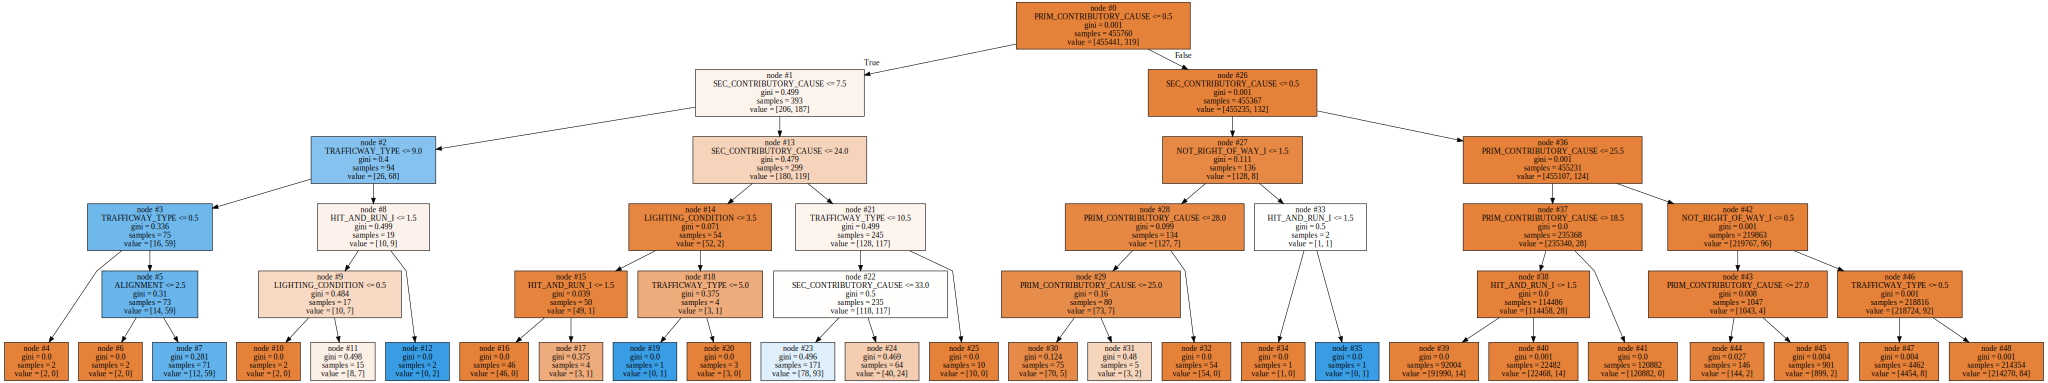

In [40]:
data_model_2 = DecisionTreeClassifier(random_state=1, max_depth=5)
data_model_2.fit(X_train, y_train)
plot_tree(data_model_2, X.columns.tolist())

### Decision Tree Classifier ('REAR END') with Parameters

In [41]:
data_model_2 = DecisionTreeClassifier(random_state=10, max_depth=10, max_leaf_nodes=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
data_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, random_state=10)

In [43]:
y_train_pred_2 = data_model_2.predict(X_train)
y_test_pred_2 = data_model_2.predict(X_test)
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_2)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_2)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred_2)}')

Accuracy Score Train: 0.999488766017202
Accuracy Score Test: 0.9993593119185536
ROC_AUC Test: 0.6624165642016512


<h3>
    <ul>
        <li>As we can see, Vanilla - Decision Tree model did better than Decision Tree Classifier</li>
    </ul>
</h3>

## Random Forest 

### Vanilla - Random Forest Classifier : REAR_END (minor parameter changes)

In [44]:
random_forest = RandomForestClassifier(class_weight='balanced', random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [45]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [46]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.9581161137440758
Accuracy Score Test: 0.9565824117956819
ROC_AUC Test: 0.6847323467416125


### Random Forest Classifier - Feature Importance

Feature ranking:
1. feature 11 (0.463557)
2. feature 12 (0.139815)
3. feature 4 (0.105621)
4. feature 3 (0.052248)
5. feature 0 (0.046667)
6. feature 10 (0.041431)
7. feature 2 (0.026508)
8. feature 1 (0.025470)
9. feature 6 (0.024598)
10. feature 8 (0.022451)
11. feature 9 (0.020529)
12. feature 7 (0.019096)
13. feature 5 (0.010007)
14. feature 14 (0.001471)
15. feature 13 (0.000453)
16. feature 15 (0.000078)


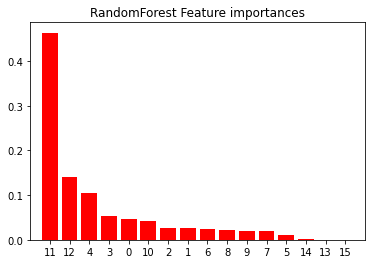

In [47]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("RandomForest Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Logistic Regression
<ul>
    <li>Accuracy Score Train: 0.5011080393189398</li> 
    <li>Accuracy Score Test: 0.4982183605406354</li>
    <li>ROC_AUC Test: 0.5678102494291235</li>
</ul>

### Vanilla - Decision Tree Classifier
<ul>
    <li>Accuracy Score Train: 0.9996379673512374</li>
    <li>Accuracy Score Test: 0.9993154291732491</li>
    <li>ROC_AUC Test: 0.6686402160548042</li>
</ul>

### Decision Tree Classifier
<ul>
    <li>Accuracy Score Train: 0.999488766017202</li>
    <li>Accuracy Score Test: 0.9993593119185536</li>
    <li>ROC_AUC Test: 0.6624165642016512</li>
</ul>

### Vanilla - Random Forest Classifier
<ul>
    <li>Accuracy Score Train: 0.9581161137440758</li>
    <li>Accuracy Score Test: 0.9565824117956819</li>
    <li>ROC_AUC Test: 0.6847323467416125</li>
</ul>

Since, ROC_AUC Score of Vanilla - Random Forest Classifier is highest

### So, we will making GridSearch for Random Forest Classifier
<br>

### Random Forest Classifier - Hyperparameters (GridSearchCV)

In [48]:
grid_params = {"n_estimators": [50, 100],
          "criterion": ["gini", "entropy"],
          "max_depth": [4, 6, 10],
          "min_samples_split": [5, 10],
          "min_samples_leaf": [5, 10],
         "max_samples": [400]}

grid_search = GridSearchCV(random_forest, grid_params, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 10], 'max_samples': [400],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='roc_auc')

In [49]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_samples': 400,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [50]:
grid_search.best_score_

0.8290781329331086

<h3>
    <ul>
        <li>ROC_AUC SCORE = 0.8290781329331086</li>
    </ul>
</h3>

## Data Visual : Rear End Crashes

In [51]:
data_frame['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        252277
DIVIDED - W/MEDIAN (NOT RAISED)     97772
ONE-WAY                             75072
PARKING LOT                         39812
DIVIDED - W/MEDIAN BARRIER          33603
FOUR WAY                            23102
OTHER                               15913
ALLEY                                9345
UNKNOWN                              6280
T-INTERSECTION                       4914
CENTER TURN LANE                     4591
DRIVEWAY                             1948
RAMP                                 1787
UNKNOWN INTERSECTION TYPE            1286
FIVE POINT, OR MORE                   571
Y-INTERSECTION                        563
TRAFFIC ROUTE                         434
NOT REPORTED                          212
ROUNDABOUT                            139
L-INTERSECTION                         79
Name: TRAFFICWAY_TYPE, dtype: int64

In [52]:
data_frame['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 214263
FAILING TO YIELD RIGHT-OF-WAY                                                        62279
FOLLOWING TOO CLOSELY                                                                58620
NOT APPLICABLE                                                                       30562
IMPROPER OVERTAKING/PASSING                                                          27224
FAILING TO REDUCE SPEED TO AVOID CRASH                                               24670
IMPROPER BACKING                                                                     24192
IMPROPER LANE USAGE                                                                  21560
IMPROPER TURNING/NO SIGNAL                                                           18813
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  18082
DISREGARDING TRAFFIC SIGNALS                                                         10739

In [53]:
rear_end = data_frame[data_frame['FIRST_CRASH_TYPE'] == 'REAR END']
rear_end.TRAFFICWAY_TYPE.value_counts().index
rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['FOLLOWING TOO CLOSELY', 'UNABLE TO DETERMINE',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'NOT APPLICABLE',
       'IMPROPER BACKING', 'WEATHER', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'DISTRACTION - FROM INSIDE VEHICLE',
       'IMPROPER OVERTAKING/PASSING',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'IMPROPER LANE USAGE', 'EQUIPMENT - VEHICLE CONDITION',
       'DISTRACTION - FROM OUTSIDE VEHICLE', 'PHYSICAL CONDITION OF DRIVER',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'DISREGARDING TRAFFIC SIGNALS', 'EXCEEDING AUTHORIZED SPEED LIMIT',
       'CELL PHONE USE OTHER THAN TEXTING',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'IMPROPER TURNING/NO SIGNAL',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'DISREGARDING STOP SIGN', 'ROAD CONSTRUCTION/M

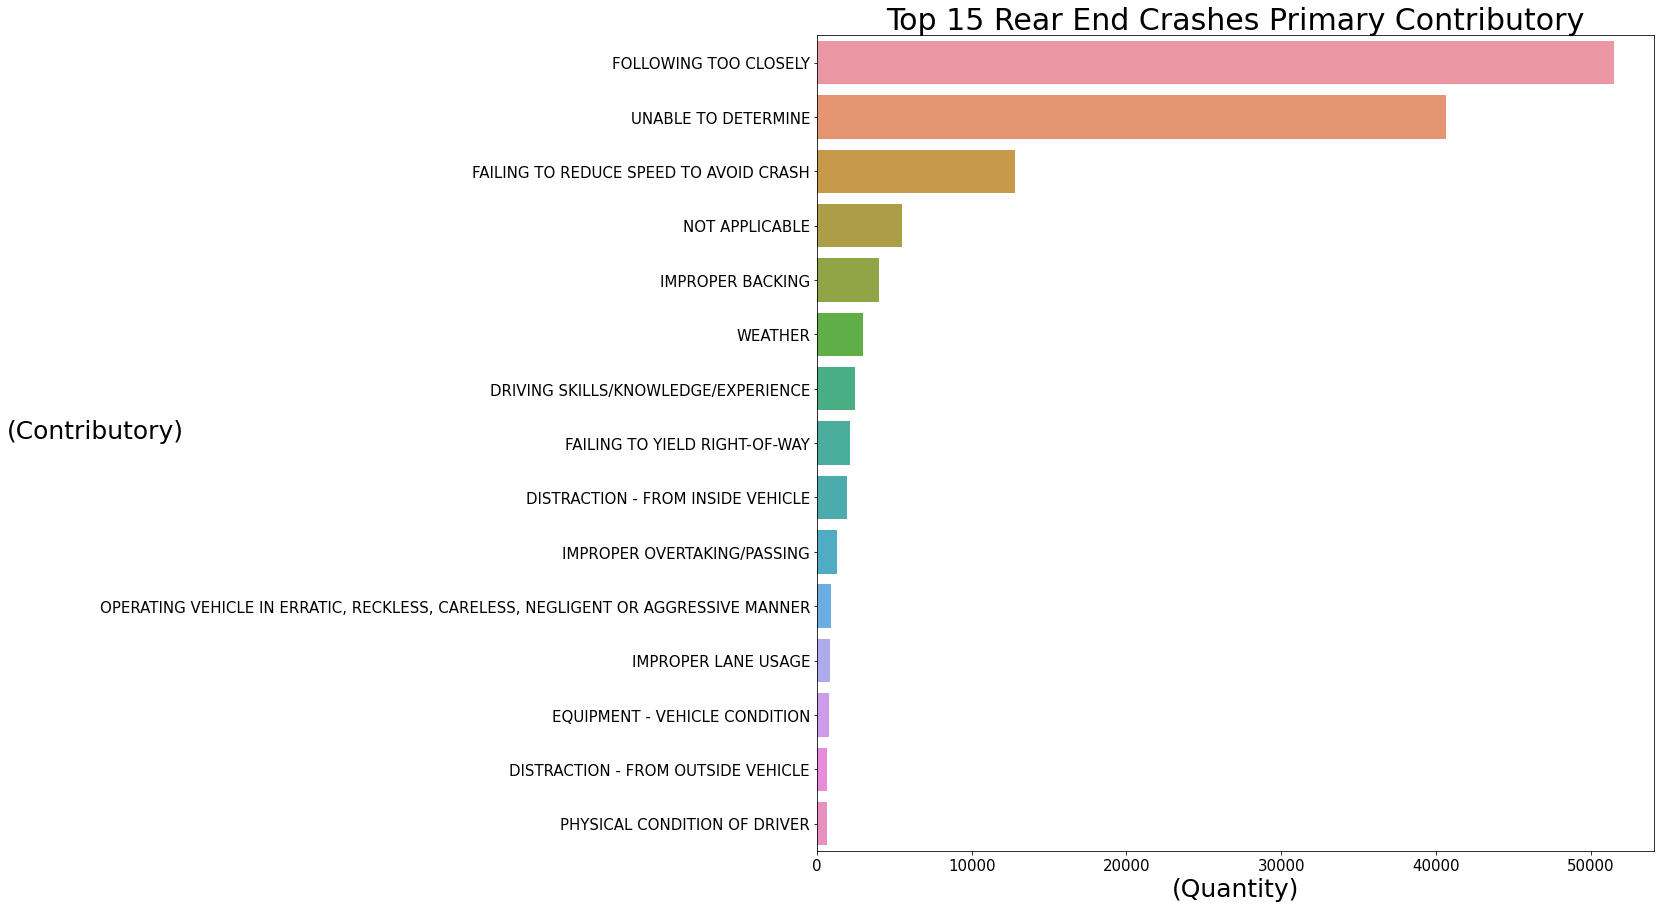

In [54]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,15))

y = rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().values[:15]
x = rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index[:15]

sns.barplot(y, x)
plt.title('Top 15 Rear End Crashes Primary Contributory', size=30)
plt.ylabel("(Contributory)", size=25, rotation=0)
plt.xlabel("(Quantity)", size=25)
plt.xticks(size=15)
plt.yticks(size=15);

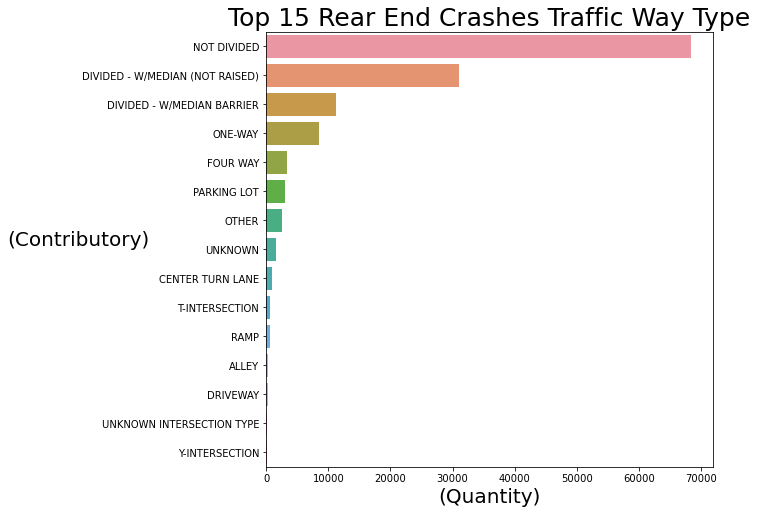

In [55]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,8))
y= rear_end.TRAFFICWAY_TYPE.value_counts().values[:15]
x=rear_end.TRAFFICWAY_TYPE.value_counts().index[:15]

sns.barplot(y, x)
plt.title('Top 15 Rear End Crashes Traffic Way Type', size=25)
plt.ylabel("(Contributory)", size=20, rotation=0)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);

# Conclusion

<ul>
    <li>Final models show that certain columns have more of an effect on the severity of a car accident than others.</li>
    <li>Demonstrated how different classification models work and how we can compare models using the roc_auc score metric.</li>
    <li>I used Random Forest classifier due to its high score among the all models used
    </li>
</ul>

### Few points that are visible in the data
<ul>
    <li>Noticed increased number of the accidents is in the month closer to October.</li>
    <li>Noticed increased number of the accidents in the rush hour.</li>
    <li>Most accidents occurred in a clear weather condition.</li>
    <li>Accidents are more likely to occur in Summer season.</li>
    <li>Most accidents happened in a DRY Road condition.</li>
    <li>Most severe and non severe accident damage cost is more than $1500.</li>
</ul>

# References